# PROJECT: Wrangle and Clean Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import tweepy as tw
import json
import time

In [2]:
%matplotlib inline

In [3]:
%config InlineBackend.figure_format = "retina"

# Gathering Data

In [4]:
#Loading the tweet archive tweet obtained as a handheld file

archive = pd.read_csv("twitter-archive-enhanced.csv")
archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [5]:
#make a list of twitter ids present in archive table
id_list = list(archive.tweet_id)

## Programmatically downloading image prediction file from url link 
#-- https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv



In [6]:
#make directory --image predictions

folder = "image_prediction"

if not os.path.exists(folder):
    os.mkdir(folder)
    
#Obtain response from url using the request library
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

#load the dcontent of the data into a file in the created folder

with open(os.path.join(folder, url.split("/")[-1]), "wb") as file:
    file.write(response.content)

## Accessing additional twitter information from twitter's API using tweepy

In [7]:
#Accessing twitter developer keys

with open("twitter_keys.txt", "r") as file:
    keys = file.readlines()

API_key = keys[0].strip("\n")
API_key_secret = keys[1].strip("\n")
Bearer_token = keys[2].strip("\n")
Access_token = keys[3].strip("\n")
Access_secret = keys[4]

In [8]:
#initializing the api class using the obtained the deveolper keys

#Authentication
auth = tw.OAuthHandler(API_key, API_key_secret)
auth.set_access_token(Access_token, Access_secret)

api = tw.API(auth, wait_on_rate_limit = True)  #Initializing class

In [10]:
#using api class to access tweet via the tweet id obtained in the first table --archive
start_time = time.time()
count = 0
len_id_list = len(id_list)
error_dict = {}
with open("json-text.txt", "w") as file:
    for tweet_id in id_list:
        count+=1
        print(count, f"out of {len_id_list}")
        try:
            response = api.get_status(tweet_id, tweet_mode = "extended")
            json.dump(response._json, file)
            file.write("\n")
            print("success")
            #continue
        except tw.TweepError as e:
                print("Failed")
                error_dict[tweet_id] = e
        pass
        pass
    pass
time_taken = time.time() - start_time
print(time_taken)
print(error_dict)

1 out of 2356
success
2 out of 2356
success
3 out of 2356
success
4 out of 2356
success
5 out of 2356
success
6 out of 2356
success
7 out of 2356
success
8 out of 2356
success
9 out of 2356
success
10 out of 2356
success
11 out of 2356
success
12 out of 2356
success
13 out of 2356
success
14 out of 2356
success
15 out of 2356
success
16 out of 2356
success
17 out of 2356
success
18 out of 2356
success
19 out of 2356
success
20 out of 2356
Failed
21 out of 2356
success
22 out of 2356
success
23 out of 2356
success
24 out of 2356
success
25 out of 2356
success
26 out of 2356
success
27 out of 2356
success
28 out of 2356
success
29 out of 2356
success
30 out of 2356
success
31 out of 2356
success
32 out of 2356
success
33 out of 2356
success
34 out of 2356
success
35 out of 2356
success
36 out of 2356
success
37 out of 2356
success
38 out of 2356
success
39 out of 2356
success
40 out of 2356
success
41 out of 2356
success
42 out of 2356
success
43 out of 2356
success
44 out of 2356
succes

Rate limit reached. Sleeping for: 209


success
882 out of 2356
success
883 out of 2356
success
884 out of 2356
success
885 out of 2356
success
886 out of 2356
success
887 out of 2356
success
888 out of 2356
Failed
889 out of 2356
success
890 out of 2356
success
891 out of 2356
Failed
892 out of 2356
success
893 out of 2356
success
894 out of 2356
success
895 out of 2356
success
896 out of 2356
success
897 out of 2356
success
898 out of 2356
success
899 out of 2356
success
900 out of 2356
success
901 out of 2356
success
902 out of 2356
success
903 out of 2356
success
904 out of 2356
success
905 out of 2356
success
906 out of 2356
success
907 out of 2356
success
908 out of 2356
success
909 out of 2356
success
910 out of 2356
success
911 out of 2356
success
912 out of 2356
success
913 out of 2356
success
914 out of 2356
success
915 out of 2356
success
916 out of 2356
success
917 out of 2356
success
918 out of 2356
success
919 out of 2356
success
920 out of 2356
success
921 out of 2356
success
922 out of 2356
success
923 out of

Rate limit reached. Sleeping for: 204


success
1782 out of 2356
success
1783 out of 2356
success
1784 out of 2356
success
1785 out of 2356
success
1786 out of 2356
success
1787 out of 2356
success
1788 out of 2356
success
1789 out of 2356
success
1790 out of 2356
success
1791 out of 2356
success
1792 out of 2356
success
1793 out of 2356
success
1794 out of 2356
success
1795 out of 2356
success
1796 out of 2356
success
1797 out of 2356
success
1798 out of 2356
success
1799 out of 2356
success
1800 out of 2356
success
1801 out of 2356
success
1802 out of 2356
success
1803 out of 2356
success
1804 out of 2356
success
1805 out of 2356
success
1806 out of 2356
success
1807 out of 2356
success
1808 out of 2356
success
1809 out of 2356
success
1810 out of 2356
success
1811 out of 2356
success
1812 out of 2356
success
1813 out of 2356
success
1814 out of 2356
success
1815 out of 2356
success
1816 out of 2356
success
1817 out of 2356
success
1818 out of 2356
success
1819 out of 2356
success
1820 out of 2356
success
1821 out of 2356


In [70]:
#load each line of the txt json-text.txt file just created and append it
#to empty list json_list
json_list = []
with open("json-text.txt", "r") as file:
    for x in id_list:
        json_list.append(file.readline())

In [71]:
pd_list = []
len_ = len(json_list)  #obatain length of list to iterate over
for i in range(len_):
    if not json_list[i]:   #This condition tests if the json_string is empty
        continue
    else:
        json_load = json.loads(json_list[i])
        tweet_id = json_load["id_str"]
        time = json_load["created_at"]
        likes = json_load["favorite_count"]
        retweet_counts = json_load["retweet_count"]
        json_dict = {"tweet_id": tweet_id,
                    "timestamp": time,
                    "likes": likes,
                    "retweet_count": retweet_counts}
    pd_list.append(json_dict)

In [72]:
additional_info = pd.DataFrame(pd_list)  #use pd.DataFrame for make dataframe

#### Load and print all three tables

In [73]:
#First table, archives of tweet handed over
archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [74]:
#Second tabele stored in image prediction folder

img_prediction = pd.read_csv("./image_prediction/image-predictions.tsv", sep = "\t")
img_prediction.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [75]:
additional_info.head(2)

,tweet_id,timestamp,likes,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,33880,7027
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29380,5305


# Asessing the tables

In [76]:
archive.to_csv("archive.csv", index = False)
img_prediction.to_csv("img_prediction.csv", index = False)
additional_info.to_csv("add_info.csv", index = False)

In [77]:
archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1983,672964561327235073,NaN,NaN,2015-12-05 02:23:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Terry. He's a Toasty Western Sriracha....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672964561...,10,10,Terry,None,None,None,None


In [78]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

From the above we can spot incomplete columns and invalid datatypes as detailedly refreenced below

In order to have a visual view and asssessment of the non null values of the retweet_id columns, we will run the code below

In [79]:
archive[archive.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


Let us further investigate the unique properties of the dog stages columns and have a clearer of perspective of what data we are dealing with.


In [80]:
print(archive.pupper.nunique())
print(archive.pupper.unique())

print(archive.puppo.nunique())
print(archive.puppo.unique())

print(archive.doggo.nunique())
print(archive.doggo.unique())

print(archive.floofer.nunique())
print(archive.floofer.unique())

2
['None' 'pupper']
2
['None' 'puppo']
2
['None' 'doggo']
2
['None' 'floofer']


In [81]:
sum(archive.puppo.isnull()) #This examine to see if empty values are accurately represented

0

Investigate the source column programmatically to see the column values

In [82]:
archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [83]:
sum(archive.tweet_id.duplicated()) #Check for duplicates -- found none

0

In [84]:
print(archive.rating_numerator.nunique())
print(archive.rating_numerator.unique())

print(archive.rating_denominator.nunique())
print(archive.rating_denominator.unique())

40
[  13   12   14    5   17   11   10  420  666    6   15  182  960    0
   75    7   84    9   24    8    1   27    3    4  165 1776  204   50
   99   80   45   60   44  143  121   20   26    2  144   88]
18
[ 10   0  15  70   7  11 150 170  20  50  90  80  40 130 110  16 120   2]


In [85]:
archive[archive.name == "None"]  #An iterating step brought me back to exmine and check for names recorded as None

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


On an iterative step, row 46(index 45 was found to contain decimal figures and the corresponding extraction only extracted the decimal part) 

In [86]:
archive.loc[45, ["text", "rating_numerator"]].text

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [87]:
#To check for texts that contain deciamal strings

archive[archive.text.str.contains(r"(\d+\.\d*\/\d+)")][["text", "rating_numerator"]]

<ipython-input-87-c0cadd2e04c8>:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  archive[archive.text.str.contains(r"(\d+\.\d*\/\d+)")][["text", "rating_numerator"]]


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [88]:
#let us check a random index, as well as visually to see what was being 

archive.loc[695, :].text

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

We see that only the decimal part are being extracted and not the integer part

In [89]:
#let us check for denominator also

archive[archive.text.str.contains(r"(\d+(\.\d*)?\/\d+\.\d+)")][["text", "rating_denominator"]]

<ipython-input-89-3ad049c76f1d>:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  archive[archive.text.str.contains(r"(\d+(\.\d*)?\/\d+\.\d+)")][["text", "rating_denominator"]]


,text,rating_denominator


So only the numerator is affected and the denominator is not affected.
- At this point it is also important that the rating_numerator would also have to have a different datatype

On an iterative step, we discover that some dogs have more than one dog stage. Lets us see the datasets where that happened.

In [90]:
archive.loc[(archive[["floofer", "pupper", "puppo", "doggo"]] !="None").sum(axis = 1) > 1]
#the index would give a boolean array that can be used to subset the data as shown below

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [91]:
archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

**Check for img_prediction table next**

In [92]:
img_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [93]:
img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [94]:
img_prediction.img_num.unique()

array([1, 4, 2, 3], dtype=int64)

In [95]:
sum(img_prediction.jpg_url.duplicated()) #Check for same image

66

**Check for additional_info table next**

In [96]:
additional_info

,tweet_id,timestamp,likes,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,33880,7027
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29380,5305
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,22099,3489
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,36996,7239
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,35372,7779
...,...,...,...,...
2322,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,89,37
2323,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,247,115
2324,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,100,36
2325,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,112,39


In [97]:
additional_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2327 non-null   object
 1   timestamp      2327 non-null   object
 2   likes          2327 non-null   int64 
 3   retweet_count  2327 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 72.8+ KB


In [98]:
additional_info.describe()

,likes,retweet_count
count,2327.000000,2327.000000
mean,7065.990546,2476.987108
std,10979.798095,4194.162577
min,0.000000,1.000000
25%,1226.500000,497.000000
50%,3056.000000,1152.000000
75%,8620.500000,2866.500000
max,145123.000000,70922.000000


In [99]:
sum(additional_info.tweet_id.duplicated()) #Check for duplicate tweets

0

### Documenting Assessments from Archive table
##### Quality Issues
- Highly missing values in columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls(few missing values for expanded urls))
- timestamp column contains extra +0000 character at the end and also time values which might not be necessary for analysis
- Wrong datatype
    - tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id(string is appropriate)
    - timestamp, retweeted_status_timestamp are not datetime datatype
- doggo, floofer, pupper and puppo columns use None instead of NaN
- Source column contains the soure of each tweet and datatype should be category.
- Some tweets are retweets. Tweets that have non-null retweet_id. They are not regarded as original tweets.
- The rating_numerator and rating_numerator can be combined as one observatory value as rating.
- Recorded name as None
- Decimal values of rating_numerator instead of only the fractional part
- float datatype of rating_numerator instead of int

##### Tidyness Issues
- Values as columns in doggo, floofer, pupper and puppo columns
- Some tweets have more than one value for dog stage (floofer, doggo, puppo pupper)


### Documenting Assessments from img_prediction table
##### Quality Issues
- tweet_id should be string
- The first 3 columns seem to be the only relevant for the analysis we want to perform.
- Duplicate image urls
- descriptive column name (img_num)

### Documenting Assessments from additional_info table
##### Quality Issues
- timestamp has extra +0000 characters and should be datetime object

##### Tidyness Issues
- Merge all three tables as tweet-master-archive

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [100]:
#make copies of each dataframe

archive_clean = archive.copy()
img_prediction_clean = img_prediction.copy()
additional_info_clean = additional_info.copy()

### Issue #1: 
Archive table - Highly missing values in columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls(few missing values for expanded urls))

The reason for this highly missing values in the column is because of nature of tweet. For example, only tweets that are retweet have retweet_id e.t.c.
    
We are however dealing with original tweets and not retweets

#### Define:

- Slice table for where retweet_id is null and drop all retweet related columns
- Drop the in_reply columns and expanded urls (they contribute little or nothing)

#### Code

In [101]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()] #slicing dataframe

In [102]:
archive_clean.drop(["retweeted_status_id", 
                    "retweeted_status_user_id", "retweeted_status_timestamp"], axis = 1, inplace = True)

In [103]:
archive_clean.drop(["in_reply_to_status_id", 
                    "in_reply_to_user_id", 
                    "expanded_urls"], axis = 1, inplace = True)

#### Test

Note: The number of non null retweet columns was 181 from a dataframe of originally 2356 entries

In [104]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Issue #2: 
- Values as columns in doggo, floofer, pupper and puppo columns

#### Define:

- Use the apply and join function on the given columns to combine them together by commas.

#### Code

In [105]:
archive_clean["dog_stage"] = archive_clean[["floofer", "pupper", "doggo", "puppo"]].apply(lambda x: ",".join(x), axis = 1)

In [106]:
archive_clean.drop(["floofer", "pupper", "doggo", "puppo"], axis = 1, inplace = True)

#### Test



In [107]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [108]:
archive_clean.dog_stage.unique()

array(['None,None,None,None', 'None,None,doggo,None',
       'None,None,None,puppo', 'None,pupper,None,None',
       'floofer,None,None,None', 'None,None,doggo,puppo',
       'floofer,None,doggo,None', 'None,pupper,doggo,None'], dtype=object)

In [109]:
sum(archive_clean.dog_stage!="None")

2175

### Issue #3: 
- doggo, floofer, pupper and puppo columns use None instead of NaN

#### Define:

- Replace "None" with empty string
- replace empty string with np.nan
- strip strings of leading commas

#### Code

In [110]:
archive_clean.dog_stage = archive_clean.dog_stage.str.replace(r"(None,?)+", "") #replace with empty string

<ipython-input-110-80ddf42caae3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  archive_clean.dog_stage = archive_clean.dog_stage.str.replace(r"(None,?)+", "") #replace with empty string


In [111]:
archive_clean.dog_stage = archive_clean.dog_stage.replace("", np.nan).str.strip(",")

#### Test


In [112]:
archive_clean.shape  

(2175, 8)

In [113]:
archive_clean.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'floofer,doggo', 'pupper,doggo'], dtype=object)

In [114]:
sum(archive_clean.dog_stage.notnull())

344

### Issue #4: 
- timestamp column contains extra +0000 character at the end and also time values which might not be necessary for analysis.

#### Define:

- slice string to retain valuable characters
- convert column to datetime object

#### Code

In [115]:
archive_clean.timestamp = archive_clean.timestamp.apply(lambda x: x.split("+")[0]) #string to extract strict date time values

In [116]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)  #Conert to datetime object

#### Test

In [117]:
archive_clean.timestamp.value_counts()

2017-08-01 16:23:56    1
2016-01-06 23:33:58    1
2016-01-05 01:44:52    1
2016-01-05 02:09:54    1
2016-01-05 02:30:55    1
                      ..
2016-08-01 02:45:22    1
2016-08-01 19:07:17    1
2016-08-01 23:15:56    1
2016-08-02 01:44:48    1
2015-11-15 22:32:08    1
Name: timestamp, Length: 2175, dtype: int64

In [118]:
archive_clean.timestamp.dtype #Check for datatype of the column timestamp

dtype('<M8[ns]')

### Issue #5: 
- tweet_id column of archive table datatype to string

#### Define:

- Convert column to string

#### Code

In [119]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

#### Test

In [120]:
archive_clean.tweet_id.dtype

dtype('O')

### Issue #6: 
- Source column contains the soure of each tweet and datatype should be category.

#### Define:

- Split the column by delimeter ">" and select nth index as appropriate.
- Convert column to category

#### Code

In [121]:
#split column by delimeter ">" and extract valid string

archive_clean.source = archive_clean.source.apply(lambda x: x.split(">")[1][:-3])

In [122]:
#convert to category

archive_clean.source = archive_clean.source.astype("category")

#### Test

In [123]:
archive_clean.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone', 'Vine - Make a Scene']

### Issue #7: 
- The rating_numerator is not correctly extracted
- The rating_numerator datatype needs to be float not int

#### Define:

- Use regex to extract out the numerator string
- Convert extracted numerator string to float

#### Code

In [124]:
numerator = archive_clean.text.str.extract(r"(\d+\.?\d*\/)").apply(lambda x: x.str.strip("/"))

In [125]:
#after testing equate rating_numerator to equal numerator

archive_clean.rating_numerator = numerator

#### Test

In [126]:
numerator.sample(6)

,0
735,10
1146,11
983,10
1413,10
1669,8
1103,8


In [127]:
#convert rating_numerator column to float

archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)

In [129]:
index

Int64Index([45, 340, 695, 763, 1689, 1712], dtype='int64')

In [140]:
#Test numerator to see that certain indices are correctly extracted
index = archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][["text", "rating_numerator"]].index
numerator.loc[index, :]

<ipython-input-140-64ae23c0b59c>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  index = archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][["text", "rating_numerator"]].index


,0
45,13.5
695,9.75
763,11.27
1689,9.5
1712,11.26


In [142]:
#Check specific rows in the data
archive_clean.loc[index, :][["text", "rating_numerator"]]

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1689,I've been told there's a slight possibility he...,9.50
1712,Here we have uncovered an entire battalion of ...,11.26


In [143]:
#Check datatype
archive_clean.rating_numerator.dtype

dtype('float64')

### Issue #8: 
- The rating_numerator and rating_numerator can be combined as one observatory value as rating.

#### Define:

- Divide the rating numerator by the denominator and record as rating
- Drop rating_numerator and rating_denominator

#### Code

In [144]:
archive_clean["rating"] = archive_clean.rating_numerator/archive_clean.rating_denominator

In [145]:
archive_clean.drop(["rating_numerator", "rating_denominator"], axis = 1, inplace = True)

#### Test

In [146]:
archive_clean.sample(5)

,tweet_id,timestamp,source,text,name,dog_stage,rating
1975,672997845381865473,2015-12-05 04:36:04,Twitter for iPhone,Say hello to Kenzie. She is a fluff ball. 12/1...,Kenzie,NaN,1.2
363,829374341691346946,2017-02-08 17:00:26,Twitter for iPhone,This is Astrid. She's a guide doggo in trainin...,Astrid,doggo,1.3
1127,729838605770891264,2016-05-10 01:00:58,Twitter for iPhone,"""Challenge completed"" \n(pupgraded to 12/10) h...",None,NaN,1.2
493,813202720496779264,2016-12-26 02:00:11,Twitter for iPhone,Here's a doggo who has concluded that Christma...,None,doggo,1.1
1885,674793399141146624,2015-12-10 03:30:58,Twitter for iPhone,I have found another. 13/10 https://t.co/HwroP...,None,NaN,1.3


### Issue #8: 

- The None value of the name column can be left as None or renamed as unnamed or another variable but I would not really support using np.nan as a value, maybe not available because they are tweets that did not reference the name of the particular dog

### Issue #9: 

- img_prediction table: The first 3 columns seem to be the only relevant for the analysis we want to perform

#### Code

In [147]:
img_prediction_clean = img_prediction_clean[["tweet_id", "jpg_url", "img_num"]]

#### Test

In [148]:
img_prediction_clean.head(2)

,tweet_id,jpg_url,img_num
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1


### Issue #10: 

- img_prediction: tweet_id should be string.

#### Code

In [149]:
img_prediction_clean.tweet_id = img_prediction_clean.tweet_id.astype(str)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Test

In [150]:
img_prediction_clean.tweet_id.dtype

dtype('O')

### Issue #11: 

- img_num: Rename img_num to img_classifiacation

#### Code

In [151]:
img_prediction_clean.rename(columns = {"img_num": "img_class"}, inplace = True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


#### Test

In [152]:
img_prediction_clean.sample()

,tweet_id,jpg_url,img_class
1656,810657578271330305,https://pbs.twimg.com/media/C0AIwgVXAAAc1Ig.jpg,1


### Issue #12: 

- jpg_url duplicate suggests that multiple tweets point to a particular img which is not an uncommon thing. so we will preserve this information and not delete the duplicates

### Issue #13: 

- additional_info: timestamp has extra +0000 characters and should be datetime object

#### Code

In [153]:
additional_info_clean.timestamp = pd.to_datetime(additional_info_clean.timestamp)

In [154]:
additional_info_clean.timestamp = pd.to_datetime(additional_info_clean.timestamp.apply(lambda x: str(x).split("+")[0]))
#string to extract strict date time values

#### Test

In [155]:
additional_info_clean.timestamp.value_counts()

2017-08-01 16:23:56    1
2016-01-17 21:01:41    1
2016-01-14 02:25:31    1
2016-01-13 22:22:41    1
2016-01-13 16:56:30    1
                      ..
2016-09-05 19:22:09    1
2016-09-05 15:58:34    1
2016-09-05 02:00:22    1
2016-09-04 23:46:12    1
2015-11-15 22:32:08    1
Name: timestamp, Length: 2327, dtype: int64

In [156]:
additional_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       2327 non-null   object        
 1   timestamp      2327 non-null   datetime64[ns]
 2   likes          2327 non-null   int64         
 3   retweet_count  2327 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 72.8+ KB


### Tidyness Issues

#### Define
- Merge all three tables to be a master dataframe for classifying and rating dogs

#### Code

In [157]:
twitter_master_archive = pd.merge(archive_clean, img_prediction_clean, how = "inner", on = "tweet_id")

In order to mege the twiiter master df to the additional information, we will need to drop the timestamp of the additional info

In [158]:
additional_info_clean.drop("timestamp", axis = 1, inplace = True)

In [159]:
#merge with twitter master archive

twitter_master_archive = pd.merge(twitter_master_archive, additional_info_clean, how = "inner", on = "tweet_id")

#### Test

In [160]:
twitter_master_archive.head()

,tweet_id,timestamp,source,text,name,dog_stage,rating,jpg_url,img_class,likes,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,33880,7027
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,29380,5305
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,22099,3489
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,36996,7239
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,35372,7779


In [161]:
twitter_master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       1986 non-null   object        
 1   timestamp      1986 non-null   datetime64[ns]
 2   source         1986 non-null   category      
 3   text           1986 non-null   object        
 4   name           1986 non-null   object        
 5   dog_stage      305 non-null    object        
 6   rating         1986 non-null   float64       
 7   jpg_url        1986 non-null   object        
 8   img_class      1986 non-null   int64         
 9   likes          1986 non-null   int64         
 10  retweet_count  1986 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 172.8+ KB


Convert img_class to categorical variables.

In [162]:
twitter_master_archive.img_class = twitter_master_archive.img_class.astype("category")

In [163]:
twitter_master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       1986 non-null   object        
 1   timestamp      1986 non-null   datetime64[ns]
 2   source         1986 non-null   category      
 3   text           1986 non-null   object        
 4   name           1986 non-null   object        
 5   dog_stage      305 non-null    object        
 6   rating         1986 non-null   float64       
 7   jpg_url        1986 non-null   object        
 8   img_class      1986 non-null   category      
 9   likes          1986 non-null   int64         
 10  retweet_count  1986 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 159.4+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [164]:
#Save master dataframe

twitter_master_archive.to_csv("twitter_archive_master.csv", index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [165]:
twitter_master_archive.head()

,tweet_id,timestamp,source,text,name,dog_stage,rating,jpg_url,img_class,likes,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,33880,7027
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,29380,5305
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,22099,3489
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,36996,7239
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,35372,7779


In [166]:
twitter_master_archive.describe()

,rating,likes,retweet_count
count,1986.000000,1986.000000,1986.000000
mean,1.164734,7722.939577,2248.988419
std,4.072475,11392.683091,4027.998323
min,0.000000,66.000000,11.000000
25%,1.000000,1640.500000,498.250000
50%,1.100000,3469.500000,1083.500000
75%,1.200000,9579.250000,2567.000000
max,177.600000,145123.000000,70922.000000


In [167]:
twitter_master_archive.describe(include = "object")

,tweet_id,text,name,dog_stage,jpg_url
count,1986,1986,1986,305,1986
unique,1986,1986,934,7,1986
top,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,None,pupper,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
freq,1,1,545,203,1


### Insights:
1. The average rating for each dog is 1.17 approximately which is greater than 1. This tells us about how wedogrates do rate the dogs.

2. The average number of likes/favourites and retweets that they receive per tweet is 7727 and 2250 respectively, while the maximum likes and retweets are 145159 and 70940 respectively

3. We have up to 545 unnamed dogs.

### Visualization

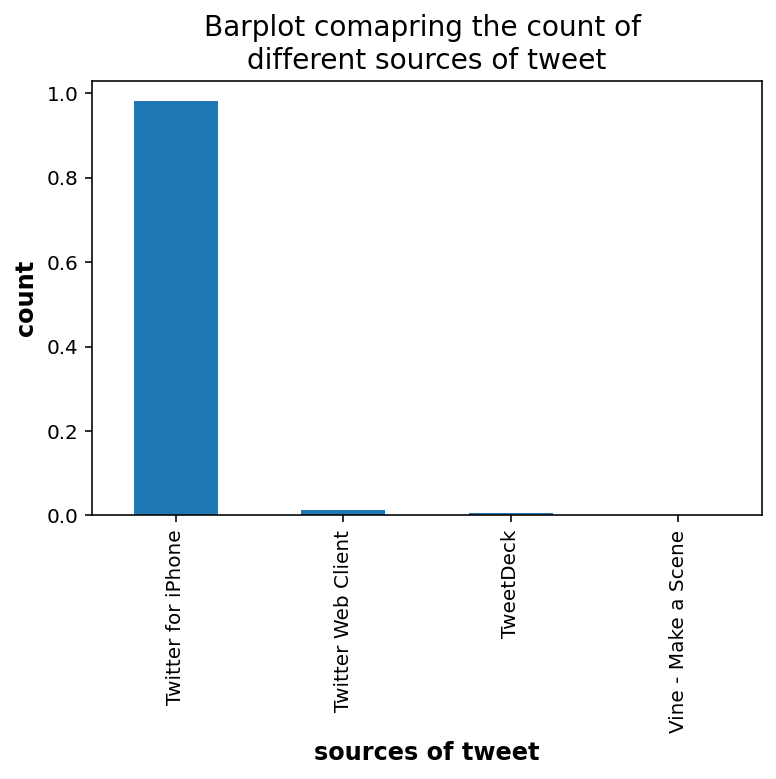

In [168]:
twitter_master_archive.source.value_counts(normalize = True).plot(kind = "bar")
plt.title("Barplot comapring the count of \ndifferent sources of tweet", fontsize = 14)
plt.ylabel("count", fontsize = 12, weight = "bold")
plt.xlabel("sources of tweet", fontsize = 12, weight = "bold");

Most of the tweets from wedogrates are made from iphone and a very inconsequential amount is made from Twitteer for Web Client, where all others can be overlooked.

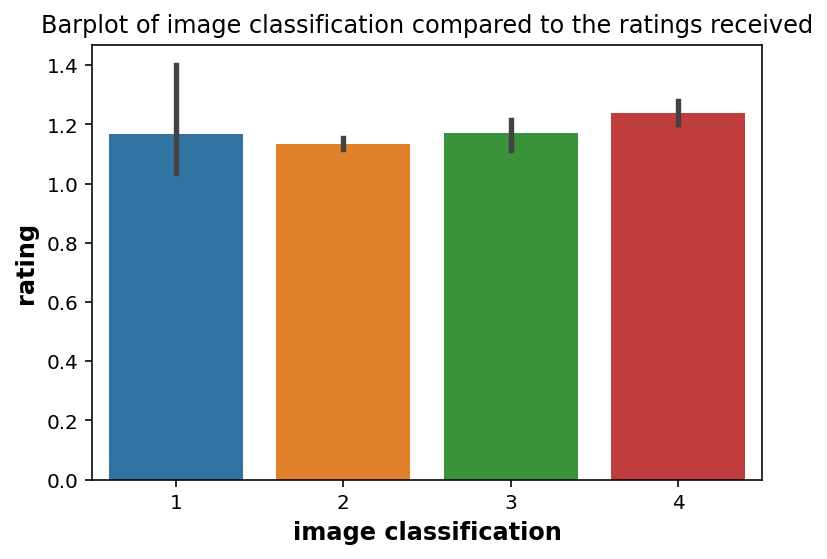

In [169]:
sns.barplot(data = twitter_master_archive, x = "img_class", y = "rating")
plt.title("Barplot of image classification compared to the ratings received")
plt.ylabel("rating", fontsize = 12, weight = "bold")
plt.xlabel("image classification", fontsize = 12, weight = "bold");

- Image class 1 has the highest spread of rating from about 1.0 to 1.4 - This is represented in the wick above each bar in the barplot above.

- The average ratings for each image classification are similar. The image classification 4 however stands to be the highest.

- The average rating is represented by the heights of the bar (without the wicks)

In [175]:
sns.barplot?

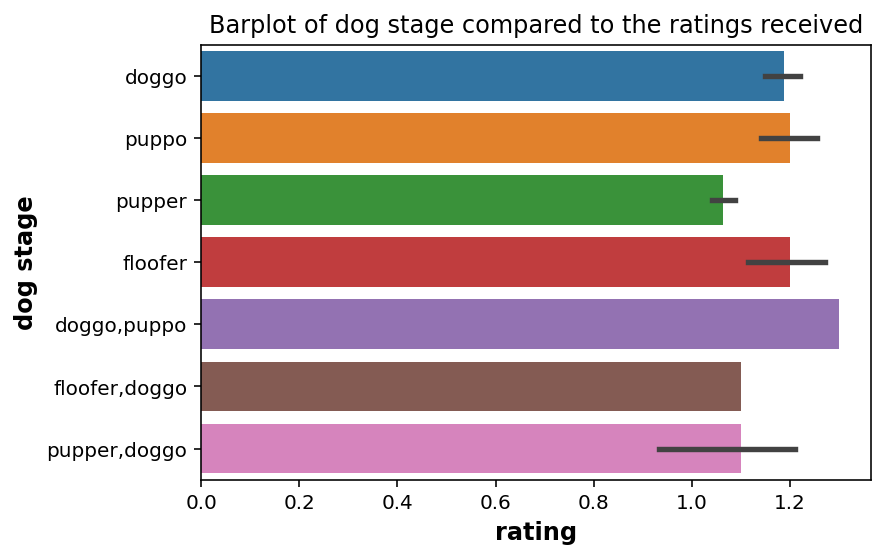

In [178]:
sns.barplot(data = twitter_master_archive, x = "rating", y = "dog_stage", orient="h")
plt.title("Barplot of dog stage compared to the ratings received")
plt.ylabel("dog stage", fontsize = 12, weight = "bold")
plt.xlabel("rating", fontsize = 12, weight = "bold");

- The rating pupper is the lowest among other form of dog stage.
- The rating doggo, puppo shows the highest with no wick i.e. just one representation

While rating and favourites count seem to be metrics for evaluating a dog, they both are metrics from different perspective. The likes being the metrics from public opinions (voting), while the rating came from enterprise metrics.

First we want to see how much do ratings and likes count correlate to each other.

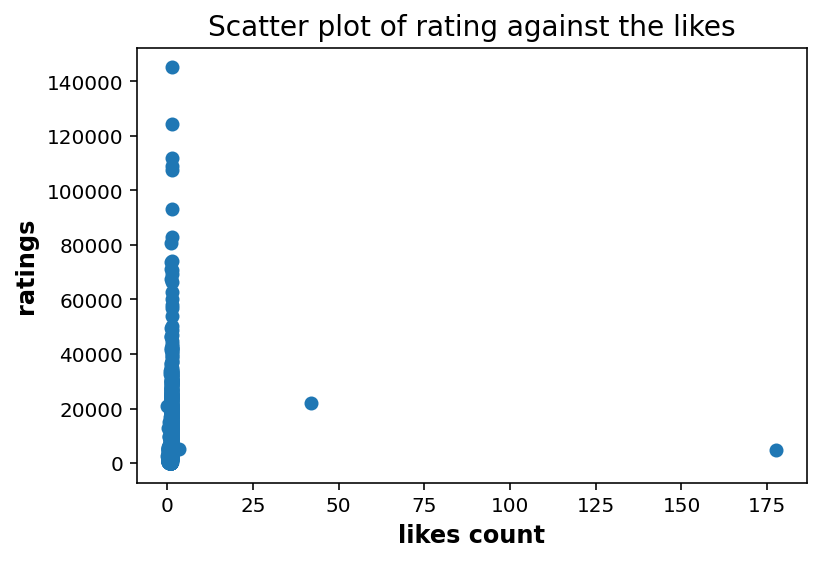

In [171]:
#scatter plot of likes and rating

plt.scatter(twitter_master_archive.rating, twitter_master_archive.likes)
plt.title("Scatter plot of rating against the likes", fontsize = 14)
plt.xlabel("likes count", fontsize = 12, weight = "bold")
plt.ylabel("ratings", fontsize = 12, weight = "bold");

The scatterplot is not properly vizualized because of outliers in the likes count axis. (ratings > 2)

In [172]:
#Numerical correlation between the metrics of interest
twitter_master_archive.corr()

,rating,likes,retweet_count
rating,1.000000,0.021380,0.022338
likes,0.021380,1.000000,0.928405
retweet_count,0.022338,0.928405,1.000000


In [173]:
#drop index of likes greater than 2
row_to_drop = twitter_master_archive[twitter_master_archive.rating > 2]
ind_to_drop = row_to_drop.index

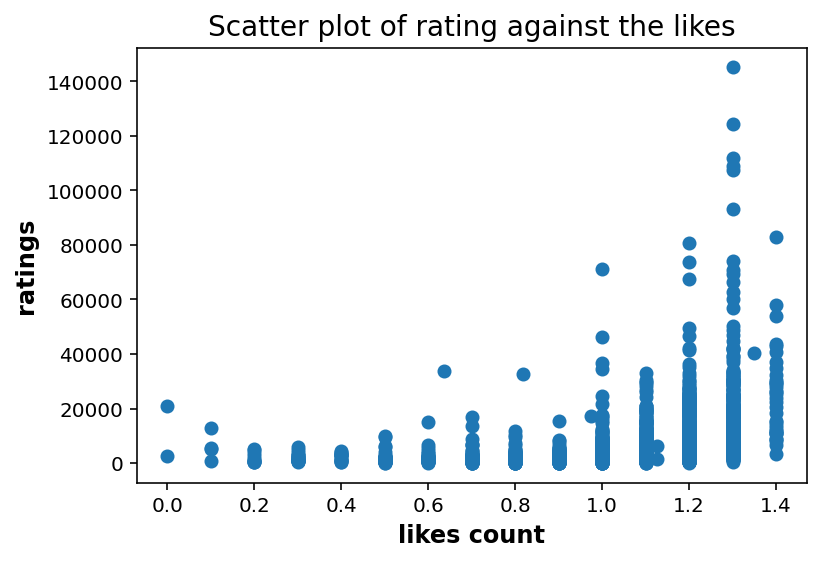

In [174]:
#Plot scatterplot of adjusted table
plt.scatter(twitter_master_archive.drop(index = ind_to_drop).rating, twitter_master_archive.drop(index = ind_to_drop).likes)
plt.title("Scatter plot of rating against the likes", fontsize = 14)
plt.xlabel("likes count", fontsize = 12, weight = "bold")
plt.ylabel("ratings", fontsize = 12, weight = "bold");

There is very little correlation as already shown in the correlation table, however the relationship is a positive one.